<a href="https://colab.research.google.com/github/MichelaMarini/MATH-6373-PyTorch-tutorial/blob/MichelaMarini%2FMATH-6373-PyTorch-tutorial%2FDataFiles/WEEK3_FFN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Batch size: 16
[Epoch 1] Training loss: 1.393 | Validation loss: 0.999
[Epoch 2] Training loss: 0.819 | Validation loss: 0.615
[Epoch 3] Training loss: 0.572 | Validation loss: 0.484
[Epoch 4] Training loss: 0.481 | Validation loss: 0.399
[Epoch 5] Training loss: 0.442 | Validation loss: 0.466
[Epoch 6] Training loss: 0.374 | Validation loss: 0.366
[Epoch 7] Training loss: 0.357 | Validation loss: 0.310
[Epoch 8] Training loss: 0.286 | Validation loss: 0.277
[Epoch 9] Training loss: 0.259 | Validation loss: 0.280
[Epoch 10] Training loss: 0.267 | Validation loss: 0.231
[Epoch 11] Training loss: 0.242 | Validation loss: 0.222
[Epoch 12] Training loss: 0.209 | Validation loss: 0.235
[Epoch 13] Training loss: 0.216 | Validation loss: 0.209
[Epoch 14] Training loss: 0.178 | Validation loss: 0.231
[Epoch 15] Training loss: 0.215 | Validation loss: 0.173
[Epoch 16] Training loss: 0.165 | Validation loss: 0.308
[Epoch 17] Training loss: 0.163 | Validation loss: 0.155
[Epoch 18] Training loss:

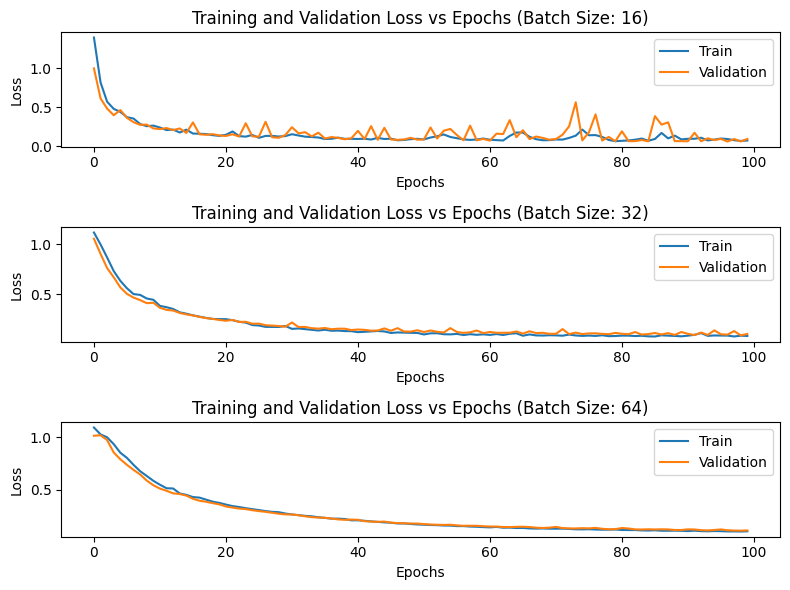

In [8]:
import torch
import torch.nn as nn
from torch.utils.data import Subset
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import time

# Check if CUDA is available, otherwise, use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

# Define the classes for 3-class classification
classes = ['setosa', 'versicolor', 'virginica']

# Create a custom dataset
class IrisDataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create datasets and data loaders
train_dataset = IrisDataset(X_train, y_train)
test_dataset = IrisDataset(X_test, y_test)

# Create a subset of the dataset with 1/100 of the images for training and validation

num_epochs = 100

def train(net, trainloader, valloader):
    train_losses = []
    val_losses = []
    start_time = time.time()  # Record start time for training
    for epoch in range(num_epochs):
        running_train_loss = 0.0
        running_val_loss = 0.0
        total_train_batches = len(trainloader)
        total_val_batches = len(valloader)

        # Training loop
        net.train()
        for i, (inputs, labels) in enumerate(trainloader):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()

            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_train_loss += loss.item()

        # Validation loop
        net.eval()
        with torch.no_grad():
            for i, (inputs, labels) in enumerate(valloader):
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = net(inputs)
                val_loss = criterion(outputs, labels)
                running_val_loss += val_loss.item()

        epoch_train_loss = running_train_loss / total_train_batches
        epoch_val_loss = running_val_loss / total_val_batches

        print('[Epoch %d] Training loss: %.3f | Validation loss: %.3f' % (epoch + 1, epoch_train_loss, epoch_val_loss))

        train_losses.append(epoch_train_loss)
        val_losses.append(epoch_val_loss)

    end_time = time.time()  # Record end time for training
    total_time = end_time - start_time  # Calculate total training time
    print("Total training time:", total_time, "seconds")  # Print total training time

    return train_losses, val_losses

# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4, 32)  # Input size is 4 for Iris dataset
        self.fc2 = nn.Linear(32, 3)  # Output is 3 for 3-class classification


    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model, criterion, and optimizer
net = Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=20, gamma=0.1)

# Loop over different batch sizes
batch_sizes = [16, 32, 64]
fig, axs = plt.subplots(len(batch_sizes), figsize=(8, 6))

for i, batch_size in enumerate(batch_sizes):
    print("Batch size:", batch_size)
    net = Net().to(device)
    optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

    # Define the training and validation loaders using the subsets
    trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    valloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Train the model
    train_losses, val_losses = train(net, trainloader, valloader)

    # Plotting
    axs[i].plot(train_losses, label="Train")
    axs[i].plot(val_losses, label="Validation")
    axs[i].set_xlabel('Epochs')
    axs[i].set_ylabel('Loss')
    axs[i].set_title(f'Training and Validation Loss vs Epochs (Batch Size: {batch_size})')
    axs[i].legend()

plt.tight_layout()
plt.show()